# D200 Problem Set 1 : Introduction to PyTorch

In [ ]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import numpy as np

## Problem 1: Tensors and Automatic Differentiation ##
Similar to numpy arrays but can run on the GPU and support automatic differentiation.


***1a. Tensors***

In [2]:
a = torch.tensor([1.0,2.0,3.0,4.0,5.0])
print(a)

tensor([1., 2., 3., 4., 5.])


In [3]:
B = torch.ones(3,3)
print(B)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [4]:
a_resh = torch.reshape(a, (5,1))
print(a_resh)

tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.]])


In [5]:
a_sqr = a **2 # or torch.pow(a, 2)
print(a_sqr)

tensor([ 1.,  4.,  9., 16., 25.])


In [6]:
B_prod = torch.matmul(B, B)
print(B_prod)

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])


***1b. Automatic Differentiation***

$f(x) = x^2 + 3x +1 \rightarrow f'(x) = 2x+3$, so at $x=2$ the derivative evaluates to $f'(2) = 7$

In [7]:
x = torch.tensor([2.0], requires_grad= True)
y = x**2 + 3*x +1

In [8]:
y.backward() # computes the derivative of y wrt to every tensor that has requires_grad = True and contribute to y

In [9]:
print(x.grad) # gradient of y wrt to x

tensor([7.])


***1.c multivariate function - differentiation***

In [10]:
x1 = torch.tensor([1.0], requires_grad=True)
y1 = torch.tensor([2.0], requires_grad= True)

In [11]:
g = x1**2 * y1 + y1**3

In [12]:
g.backward()

In [13]:
print(x1.grad)

tensor([4.])


In [14]:
print(y1.grad)

tensor([13.])


## Problem 2. Linear Regression in PyTorch ##
Linear regression using PyTorch's neutral network modules and optimizers

In [15]:
n_samples = 100
true_weight = 3.5
true_bias = 1.2

In [16]:
X = torch.randn(n_samples, 1)

In [17]:
y = true_weight * X + true_bias + 0.3 * torch.randn(n_samples, 1)

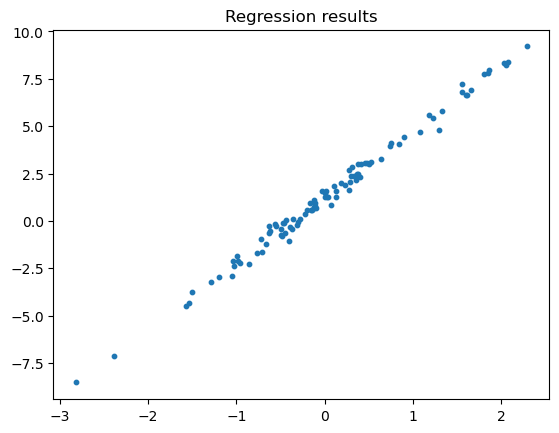

In [18]:
plt.scatter(X, y, s=10)
plt.title("Regression results")
plt.show()

In [19]:
model = nn.Linear(in_features = 1, out_features = 1)

In [20]:
print(f"Untrained model weight is: {model.weight.item()}")
print(f"Untrained model bias is: {model.bias.item()}")

Untrained model weight is: -0.6771502494812012
Untrained model bias is: 0.4161958694458008


In [21]:
# create predictions 
pred = model(X)

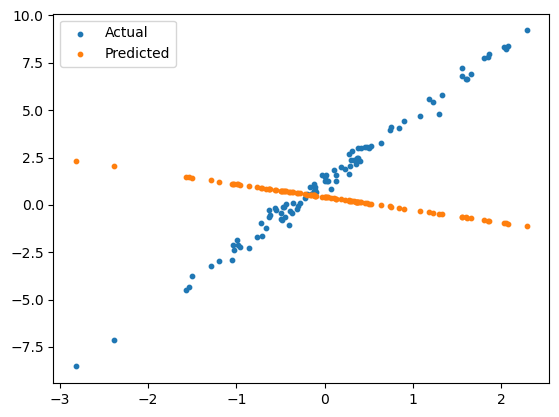

In [22]:
# Convert to numpy for plotting
X_np = X.detach().numpy()
y_np = y.detach().numpy()
pred_np = pred.detach().numpy()

plt.scatter(X_np, y_np, label = "Actual", s=10)
plt.scatter(X_np, pred_np, label = "Predicted", s=10)
plt.legend()
plt.show()

***2b. Implement training lop to fit the model***

In [23]:
n_epochs = 100

model_trained = nn.Linear(in_features=1, out_features=1)
loss_func = nn.MSELoss()
optimizer = optim.SGD(model_trained.parameters(), lr=0.1) #lr is learning rate, which controls how big the step is (SGD is stochastic gradient descent)
loss_history = []  

In [24]:
for epoch in range(n_epochs):
    # forward pass: compute predictions 
    pred_SGD = model_trained(X)
    
    # compute loss
    loss = loss_func(pred_SGD, y)
    
    # zero gradients: optimizer.zero_grad()
    optimizer.zero_grad()
    
    # backward pass: loss.backward (gradient of the loss wrt each param)
    loss.backward()
    
    # update patameter: optimizer.step()
    optimizer.step()
    
    # save the loss for plot
    loss_history.append(loss.item())

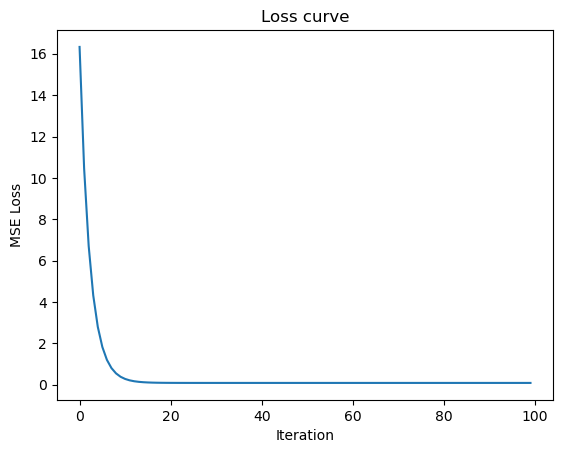

In [25]:
plt.plot(range(n_epochs), loss_history)
plt.title("Loss curve")
plt.ylabel('MSE Loss')
plt.xlabel("Iteration")
plt.show()

***2c. After training***

In [26]:
print(f"Trained model weight is: {model_trained.weight.item()}")
print(f"Trained model bias is: {model_trained.bias.item()}")

Trained model weight is: 3.4915950298309326
Trained model bias is: 1.2261422872543335


In [27]:
# Analytical result (OLS): 
ones = torch.ones(n_samples, 1)
X_aug = torch.cat([ones, X], dim =1)

beta_hat = torch.inverse(X_aug.T @ X_aug) @ X_aug.T @ y
print(beta_hat)


tensor([[1.2261],
        [3.4916]])


In [28]:
# comparison 
print(f"The SGD result deviates from OLS by {model_trained.bias.item() - beta_hat[0].item()} for bias")
print(f"The SGD result deviates from OLS by {model_trained.weight.item() - beta_hat[1].item()} for weight")

print(f"The SGD result deviates from true bias by {model_trained.bias.item() - true_bias}")
print(f"The SGD result deviates from true weight by {model_trained.weight.item() - true_weight}")

The SGD result deviates from OLS by 3.5762786865234375e-07 for bias
The SGD result deviates from OLS by -7.152557373046875e-07 for weight
The SGD result deviates from true bias by 0.02614228725433354
The SGD result deviates from true weight by -0.008404970169067383


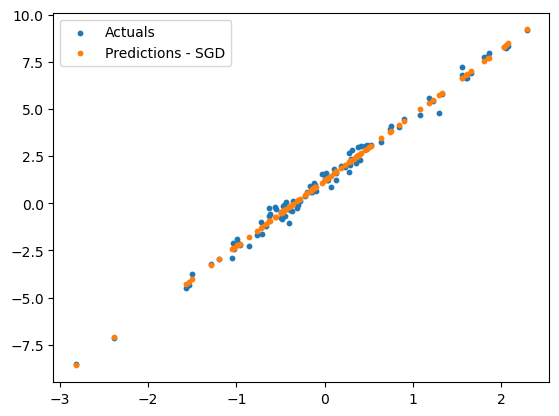

In [29]:
pred_trained = model_trained(X)
pred_train_np = pred_trained.detach().numpy()


plt.scatter(X_np, y_np, label = "Actuals", s =10)
plt.scatter(X_np, pred_train_np, label = "Predictions - SGD", s=10)
plt.legend()
plt.show()

***2.d Adam optimizer***

In [30]:
model_adam = nn.Linear(in_features=1, out_features=1)
optim_adam = optim.Adam(model_adam.parameters(), lr=0.1)
loss_adam =[]

In [31]:
for epoch in range(n_epochs):
    # 1. Forward pass: compute predictions
    pred_ad = model_adam(X)
    
    # 2. Compute loss
    loss_ad = loss_func(pred_ad, y)
    
    # 3. Zero gradients: optimizer.zero_grad()
    optim_adam.zero_grad()
    
    # 4. Backward pass: loss.backward()
    loss_ad.backward()
    
    # 5. Update parameters: optimizer.step()
    optim_adam.step()
    
    # save loss
    loss_adam.append(loss_ad.item())

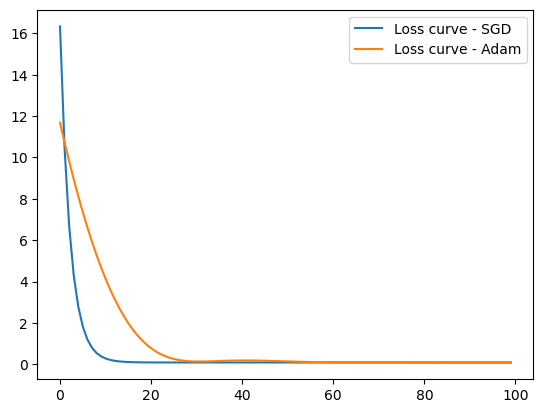

In [32]:
# SGD converges faster than Adam optimizer in this examole

plt.plot(range(n_epochs), loss_history, label = "Loss curve - SGD")
plt.plot(range(n_epochs), loss_adam, label = "Loss curve - Adam")
plt.legend()
plt.show()

## Multi-layer Perceptron on MNIST ##

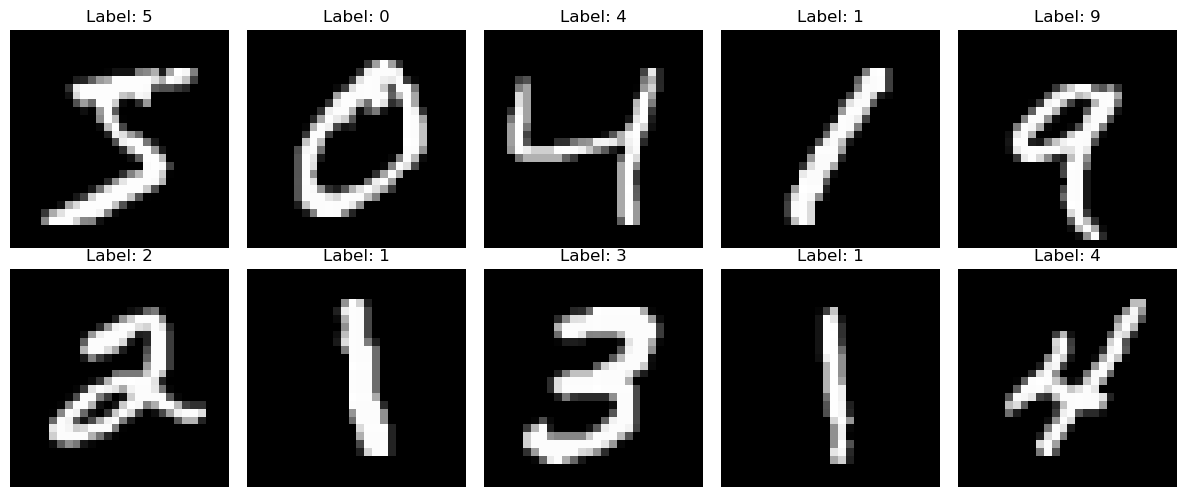

Training samples: 60000
Test samples: 10000
Image shape: torch.Size([1, 28, 28])


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Load MNIST dataset
transform = transforms.Compose([
transforms.ToTensor(),
transforms.Normalize((0.1307,), (0.3081,)) # MNIST mean and std
])

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True) # shuffling ensures random sampling & the dataset is ordered so ensures? all digits are covered
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False) # shuffle= False ensures the test results are deterministic

# Visualize some examples
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    img, label = train_dataset[i]
    ax.imshow(img.squeeze(), cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')
plt.tight_layout()
plt.show()
print(f"Training samples: {len(train_dataset)}")
print(f"Test samples: {len(test_dataset)}")
print(f"Image shape: {train_dataset[0][0].shape}")

***3a. build the architecture***

In [54]:
model_img = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 256),
    nn.ReLU(), # non linear activation function
    nn.Linear(256,128),
    nn.ReLU(),
    nn.Linear(128,10)
)

In [55]:
print(model_img)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): ReLU()
  (5): Linear(in_features=128, out_features=10, bias=True)
)


In [36]:
total_param = sum(p.numel() for p in model_img.parameters())
print(total_param)

235146


***3b. train the model***

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #cuda is gpu

def compute_accuracy(model, data_loader):
    model.eval() # Sets evaluation mode (disables dropout/batchnorm training behavior)
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1) # each row is an image and col is a number. it tells to pick the number with the largest raw score (logit)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

In [38]:
n_epoch = 5

model_img_trained = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 256),
    nn.ReLU(), # non linear activation function
    nn.Linear(256,128),
    nn.ReLU(),
    nn.Linear(128,10)
)

loss_func_img = nn.CrossEntropyLoss()
optimizer_img = optim.Adam(model_img_trained.parameters(), lr = 0.001)

training_loss = []
training_accuracy = []
test_accuracy = []

In [39]:
for epoch in range(n_epoch):
    model_img_trained.train()
    running_loss = 0
    correct = 0
    total = 0
    
    for images,labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        outputs = model_img_trained(images)
        loss = loss_func_img(outputs, labels)
        
        # backward pass and optimization
        optimizer_img.zero_grad()
        loss.backward()
        optimizer_img.step()
        
        # updating running loss
        running_loss += loss.item() * images.size(0)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    
    # Training and test accuracy
    train_acc = compute_accuracy(model_img_trained, train_loader)
    test_acc = compute_accuracy(model_img_trained, test_loader)
    
    training_loss.append(epoch_loss)
    training_accuracy.append(train_acc)
    test_accuracy.append(test_acc)    

***3c. evaluate and visualize***

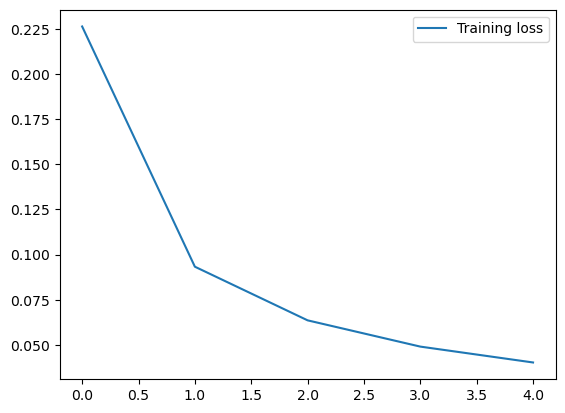

In [40]:
# plot the training loss and accuracies over epoch
plt.plot(range(n_epoch), training_loss, label = "Training loss")
plt.legend()
plt.show()

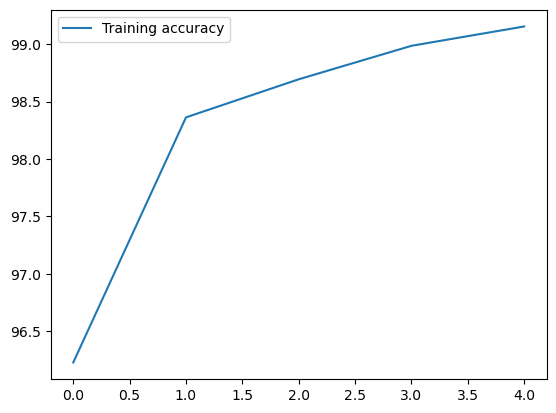

In [41]:
plt.plot(range(n_epoch), training_accuracy, label = "Training accuracy")
plt.legend()
plt.show()

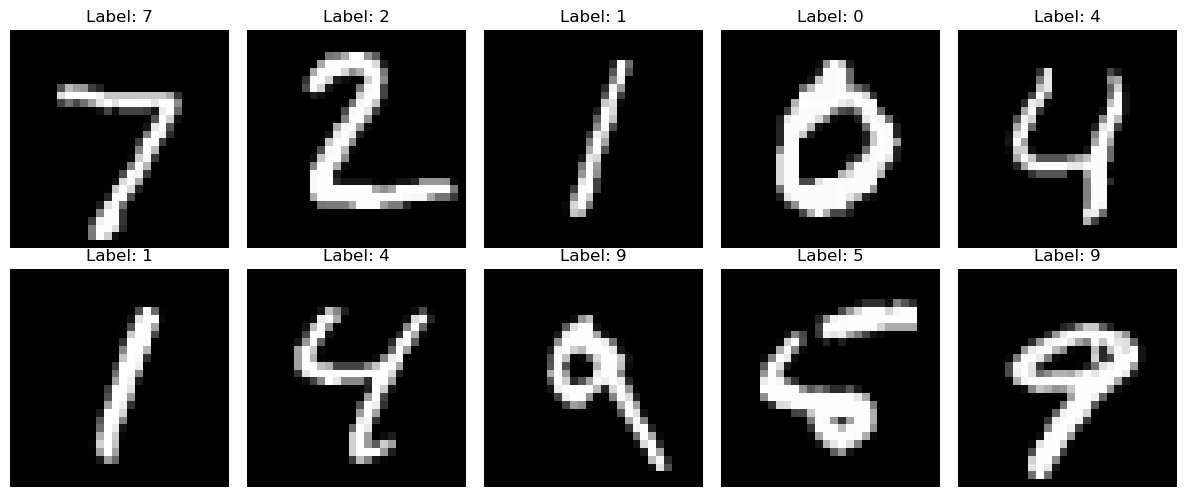

In [53]:
model_img_trained.eval() #evaluation mode
images, labels = next(iter(test_loader)) # get the data

with torch.no_grad(): #ensures gradient is not updated during test
    outputs = model_img_trained(images)
    _, predicted = torch.max(outputs, 1)
    

# make plots
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    img, label = test_dataset[i]
    ax.imshow(img.squeeze(), cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')

plt.tight_layout()
plt.show()